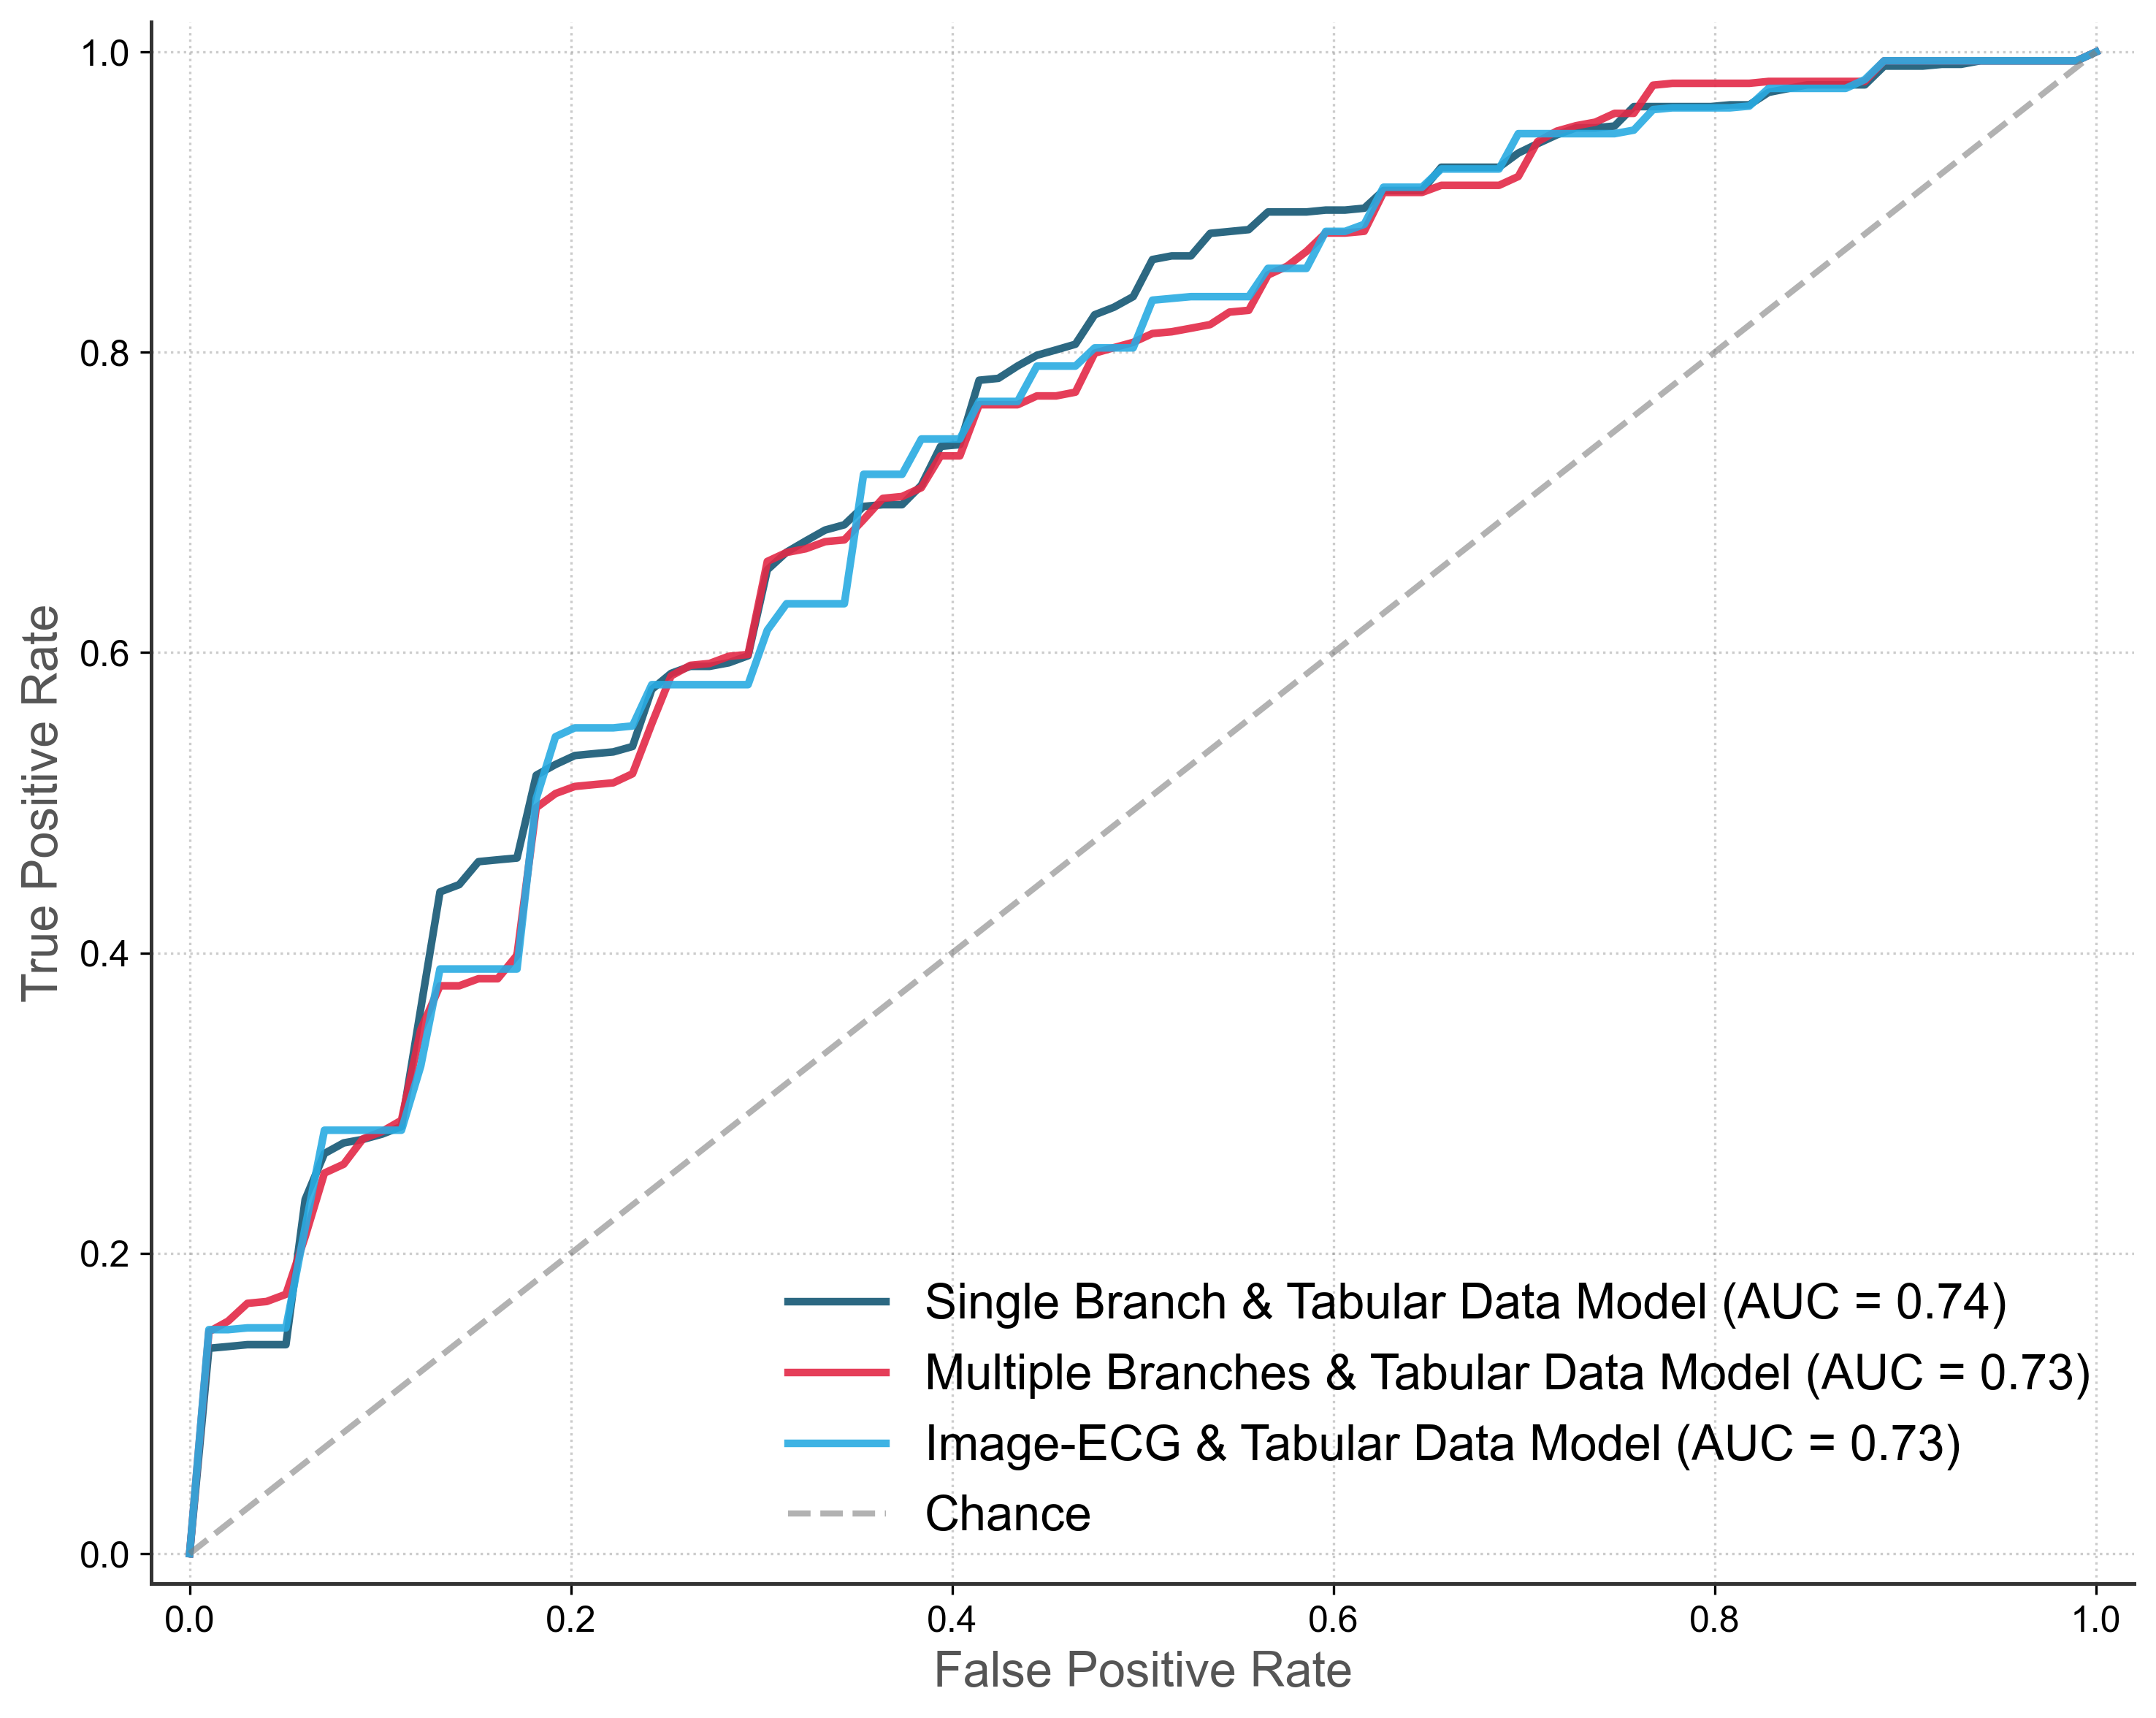

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc

# --- Global Style Settings for Presentation ---
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Manrope', 'Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 12

def plot_mean_roc_comparison(file_label_dict, output_filename="rocs_comparison.png"):
    """
    Plots multiple Mean ROC curves on a single figure for comparison.

    Parameters
    ----------
    file_label_dict : dict
        A dictionary where keys are file paths (str) and values are the 
        legend labels (str).
        Example: {'path/to/model1.csv': 'Baseline', 'path/to/model2.csv': 'New Arch'}
    
    output_filename : str
        Path to save the high-resolution figure.
    """
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # defined colour palette (consistent with previous plots)
    colors = ['#155874', '#E32947', '#29ABE2', '#E38D29', '#00B050', '#7030A0']

    # Iterate through the dictionary items
    for i, (file_path, label) in enumerate(file_label_dict.items()):
        try:
            # Read Data
            df = pd.read_csv(file_path)
            
            # Validation
            if 'Mean_FPR' not in df.columns or 'Mean_TPR' not in df.columns:
                print(f"Warning: File {file_path} missing required columns. Skipping.")
                continue

            fpr = df['Mean_FPR']
            tpr = df['Mean_TPR']

            # Calculate AUC from the curve data points
            # This ensures the legend reflects the actual plotted data
            roc_auc = auc(fpr, tpr)

            # Assign colour cyclically
            color = colors[i % len(colors)]

            # Plot Curve
            plt.plot(
                fpr, 
                tpr, 
                color=color, 
                lw=2.5, 
                label=f"{label} (AUC = {roc_auc:.2f})",
                alpha=0.9
            )

        except FileNotFoundError:
            print(f"Error: File {file_path} not found.")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    # Plot Chance Line (Diagonal)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Chance', alpha=0.6)

    # --- Presentation Styling ---
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    
    # Labels with slightly softer grey for elegance
    ax.set_xlabel('False Positive Rate', fontsize=16, fontweight='medium', color='#555555')
    ax.set_ylabel('True Positive Rate', fontsize=16, fontweight='medium', color='#555555')
    # ax.set_title('Mean ROC Comparison', loc='left', fontsize=16, fontweight='bold', color='#333333', pad=20)

    # Spine Customisation (Left/Bottom only)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    # Grid and Legend
    ax.grid(True, linestyle=':', alpha=0.4, color='grey')
    plt.legend(loc="lower right", frameon=False, fontsize=16)

    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

# --- Example Usage ---
# Define the files and their corresponding labels here
files_to_plot = {
    'mean_roc_curve_1plus5.csv': 'Single Branch & Tabular Data Model',
    'mean_roc_curve_2plus5.csv': 'Multiple Branches & Tabular Data Model',
    'mean_roc_curve_3plus5.csv': 'Image-ECG & Tabular Data Model'
}

# Run the function
plot_mean_roc_comparison(files_to_plot)